## Titanic Machine Learning Project

Using the given train.csv file creating a **machine learning model** which predicts whether a ``person with some feather would survive or not ``

In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
#loading the data
titanic_df=pd.read_csv(os.getcwd()+"\\train.csv")

In [3]:
#loading test data set
xtest_df=pd.read_csv(os.getcwd()+"\\test.csv")
ytest_df=pd.read_csv(os.getcwd()+"\\gender_submission.csv")
test_df=pd.merge(xtest_df,ytest_df,on='PassengerId')

In [4]:
#preview the dataset
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#preview the dataset
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [6]:
titanic_df.shape

(891, 12)

### Removing the duplicates if any and exploring the data

In [7]:
#removing duplicate data if any
titanic_df=titanic_df.drop_duplicates()

In [8]:
titanic_df.shape

(891, 12)

In [9]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


## Missing values

In [11]:
#check for missing values
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
#find the percentage missing values columnwise/
round(titanic_df.isnull().sum()/len(titanic_df.index),4)*100

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

# Data Cleaning and handling missing values

In [13]:
#removing the column having more than 60% missing values
titanic_Cleaned_df=titanic_df.loc[:,~(round(titanic_df.isnull().sum()/len(titanic_df.index),4)*100>60)]

In [14]:
#droping Ticket varaible as it doesn't give much information
titanic_Cleaned_df.drop('Ticket',axis=1,inplace=True)
test_df.drop('Ticket',axis=1,inplace=True)

In [15]:
titanic_Cleaned_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [16]:
#age can't be float so converting to int
import math
titanic_Cleaned_df['Age']=titanic_Cleaned_df['Age'].apply(lambda x:math.ceil(x) if pd.notnull(x) else x)

In [17]:
#imputing Age values based on title

In [18]:
titanic_Cleaned_df['Title']=titanic_Cleaned_df['Name'].str.extract('([A-Za-z]+)\.',expand=True)

In [19]:
#finding the unique titles
set(titanic_Cleaned_df['Name'].str.extract('([A-Za-z]+)\.',expand=True)[0].values)

{'Capt',
 'Col',
 'Countess',
 'Don',
 'Dr',
 'Jonkheer',
 'Lady',
 'Major',
 'Master',
 'Miss',
 'Mlle',
 'Mme',
 'Mr',
 'Mrs',
 'Ms',
 'Rev',
 'Sir'}

In [20]:
#converting differently used word in different coutries to a common format
conversions = {'Mlle': 'Miss', 'Major': 'Mr', 'Col': 'Mr', 'Sir': 'Mr', 'Don': 'Mr', 'Mme': 'Miss',
          'Jonkheer': 'Mr', 'Lady': 'Mrs', 'Capt': 'Mr', 'Countess': 'Mrs', 'Ms': 'Miss', 'Dona': 'Mrs'}

In [21]:
titanic_Cleaned_df.replace({'Title':conversions},inplace=True)

In [22]:
titanic_Cleaned_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [23]:
#finding the mean of title to impute this value to missing values
titanic_Cleaned_df.groupby('Title').mean()['Age'].round(0)

Title
Dr        42.0
Master     5.0
Miss      22.0
Mr        33.0
Mrs       36.0
Rev       43.0
Name: Age, dtype: float64

In [24]:
mean_dis=dict(titanic_Cleaned_df.groupby('Title').mean()['Age'].round(0))

In [25]:
mean_dis

{'Dr': 42.0, 'Master': 5.0, 'Miss': 22.0, 'Mr': 33.0, 'Mrs': 36.0, 'Rev': 43.0}

In [26]:
#function to impute missing values with mean value based on title
def impute_age_based_title(x):
    age,title=x
    if str(age)=='nan':
        age=mean_dis[title]
        x=int(age),title
    else:
        x=int(age),title
    return int(age)

In [27]:
titanic_Cleaned_df['Age']=titanic_Cleaned_df[['Age','Title']].apply(impute_age_based_title,axis=1)

In [28]:
titanic_Cleaned_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
Title          0
dtype: int64

In [29]:
titanic_Cleaned_df.shape

(891, 11)

In [30]:
#Doing the same for testing data
import math
test_df['Age']=test_df['Age'].apply(lambda x:math.ceil(x) if pd.notnull(x) else x)
test_df['Title']=test_df['Name'].str.extract('([A-Za-z]+)\.',expand=True)
set(test_df['Name'].str.extract('([A-Za-z]+)\.',expand=True)[0].values)

{'Col', 'Dona', 'Dr', 'Master', 'Miss', 'Mr', 'Mrs', 'Ms', 'Rev'}

In [31]:
#converting differently used word in different coutries to a single format
conversions = {'Mlle': 'Miss', 'Major': 'Mr', 'Col': 'Mr', 'Sir': 'Mr', 'Don': 'Mr', 'Mme': 'Miss',
          'Jonkheer': 'Mr', 'Lady': 'Mrs', 'Capt': 'Mr', 'Countess': 'Mrs', 'Ms': 'Miss', 'Dona': 'Mrs'}

In [32]:
test_df.replace({'Title':conversions},inplace=True)

In [33]:
test_df['Age']=test_df[['Age','Title']].apply(impute_age_based_title,axis=1)

In [34]:
test_df.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived,Title
0,892,3,"Kelly, Mr. James",male,35,0,0,7.8292,NaN,Q,0,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,7.0000,NaN,S,1,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62,0,0,9.6875,NaN,Q,0,Mr
3,895,3,"Wirz, Mr. Albert",male,27,0,0,8.6625,NaN,S,0,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,12.2875,NaN,S,1,Mrs


In [35]:
#replacing the missing fare value with mean
test_df.Fare.fillna(test_df.Fare.mean(),inplace=True)

In [36]:
#dropping cabin column
test_df.drop('Cabin',axis=1,inplace=True)

In [37]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Survived       0
Title          0
dtype: int64

### Derived features

In [38]:
#creating a variable family count
titanic_Cleaned_df['Family_count']=titanic_Cleaned_df['SibSp']+titanic_Cleaned_df['Parch']

In [39]:
def family_group(x):
    if x<=1:
        return "small"
    elif x<=4:
        return "medium"
    else:
        return "large"

In [40]:
#creating a variable that defines the sixe of family
titanic_Cleaned_df['Family_size']=titanic_Cleaned_df['Family_count'].apply(family_group)

In [41]:
#same for test data
test_df['Family_count']=test_df['SibSp']+test_df['Parch']
test_df['Family_size']=test_df['Family_count'].apply(family_group)

In [42]:
titanic_Cleaned_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family_count,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,S,Mr,1,small
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.2833,C,Mrs,1,small
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,S,Miss,0,small
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53.1000,S,Mrs,1,small
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,8.0500,S,Mr,0,small


In [43]:
#creating a variable to represent is passenger alone or not
titanic_Cleaned_df['is_alone'] = [1 if i<1 else 0 for i in titanic_Cleaned_df.Family_count]
test_df['is_alone'] = [1 if i<1 else 0 for i in test_df.Family_count]

In [44]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,Title,Family_count,Family_size,is_alone
0,892,3,"Kelly, Mr. James",male,35,0,0,7.8292,Q,0,Mr,0,small,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,7.0000,S,1,Mrs,1,small,0
2,894,2,"Myles, Mr. Thomas Francis",male,62,0,0,9.6875,Q,0,Mr,0,small,1
3,895,3,"Wirz, Mr. Albert",male,27,0,0,8.6625,S,0,Mr,0,small,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,12.2875,S,1,Mrs,2,medium,0


In [45]:
titanic_Cleaned_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family_count,Family_size,is_alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,S,Mr,1,small,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.2833,C,Mrs,1,small,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,S,Miss,0,small,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53.1000,S,Mrs,1,small,0
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,8.0500,S,Mr,0,small,1


## Univariant analysis

In [46]:
#box plot
def box_plot(column):
    sns.boxplot(column,data=titanic_Cleaned_df,orient='v')

In [47]:
#To perform chained operation without any warnings disabling the chained mode flag
pd.options.mode.chained_assignment = None

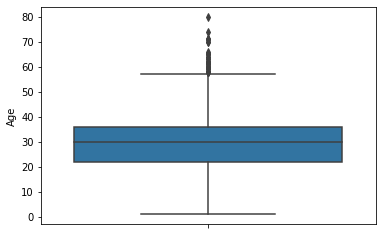

In [48]:
#to find the spread of age of passengers travelling
box_plot('Age')

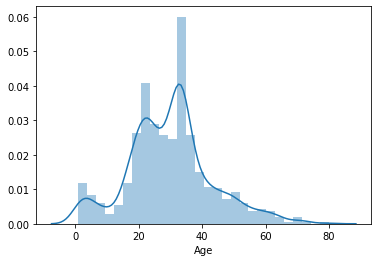

In [49]:
sns.distplot(titanic_Cleaned_df['Age'])

Average age of the passenger travlled in given titanic data set is around 35

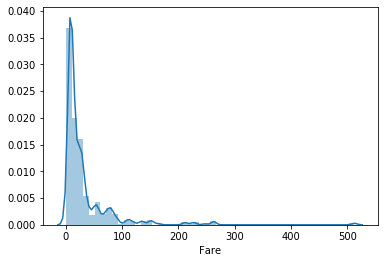

In [50]:
sns.distplot(titanic_df['Fare'])

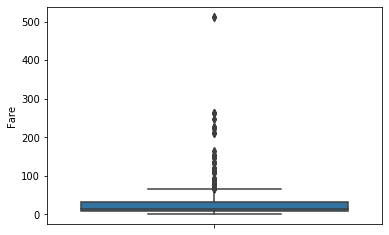

In [51]:
box_plot('Fare')

In [52]:
#price is high because family member are travelling with the passenger(Fare is directly proportional to number of people travelling in a family)

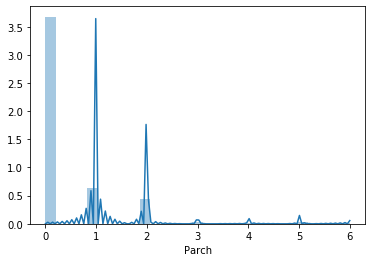

In [53]:
sns.distplot(titanic_Cleaned_df['Parch'])

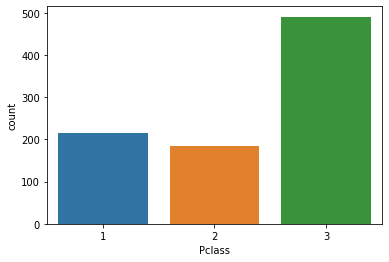

In [54]:
sns.countplot('Pclass',data=titanic_Cleaned_df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A0C1673940>]],
      dtype=object)

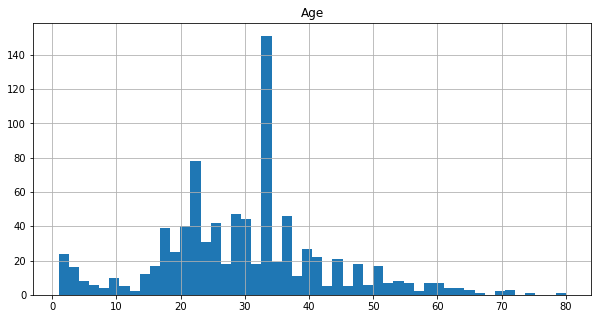

In [55]:
titanic_Cleaned_df.hist('Age',bins=50,figsize=(10,5))

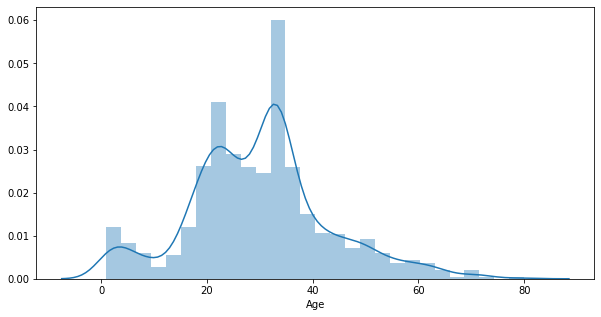

In [56]:
plt.figure(figsize=(10,5))
sns.distplot(titanic_Cleaned_df['Age'])

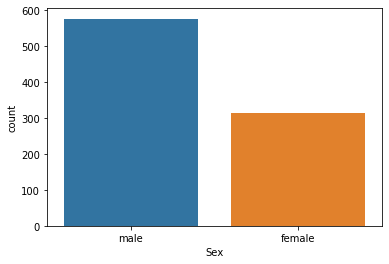

In [57]:
sns.countplot('Sex',data=titanic_Cleaned_df)

In [58]:
def male_female_child(passenger):
    age,sex=passenger
    if age<15:
        return 'child'
    else:
        return sex

In [59]:
titanic_Cleaned_df['Person']=titanic_Cleaned_df[['Age','Sex']].apply(male_female_child,axis=1)

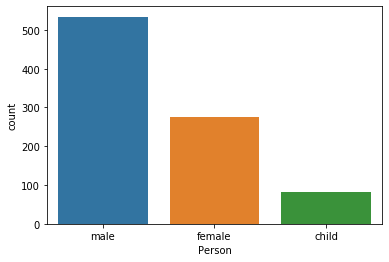

In [60]:
sns.countplot('Person',data=titanic_Cleaned_df)

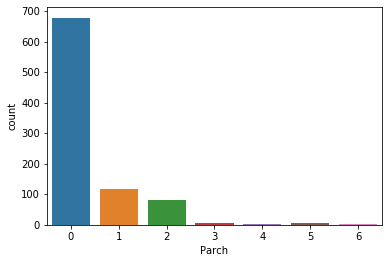

In [61]:
sns.countplot('Parch',data=titanic_Cleaned_df)

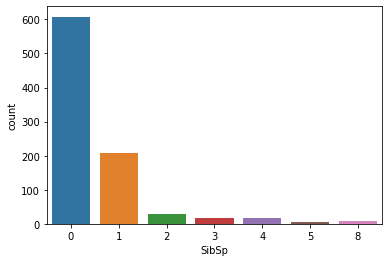

In [62]:
sns.countplot('SibSp',data=titanic_Cleaned_df)

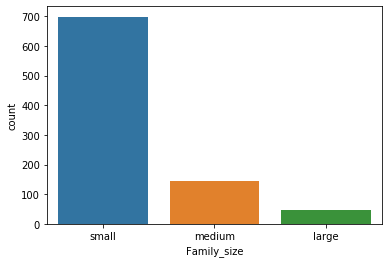

In [63]:
sns.countplot('Family_size',data=titanic_Cleaned_df)

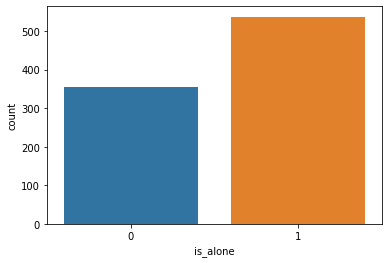

In [64]:
sns.countplot('is_alone',data=titanic_Cleaned_df)

# Segmented Analysis

## Pclass

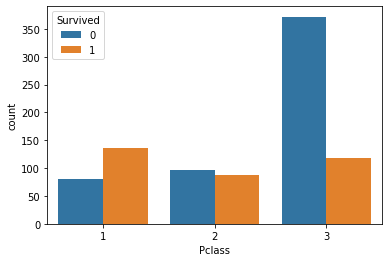

In [65]:
sns.countplot('Pclass',hue='Survived',data=titanic_Cleaned_df)

In [66]:
#People from Pclass 1 has survived more compared to other class
#Pclass 3 has low survival rate

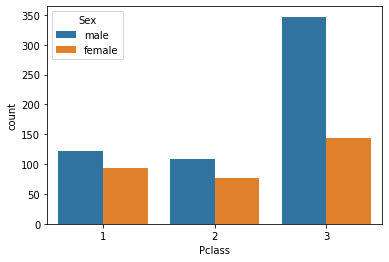

In [67]:
sns.countplot('Pclass',hue='Sex',data=titanic_Cleaned_df)

In [68]:
#most of the passenger are male, most passenger travelled in Pclass 3

In [69]:
titanic_df_survived=titanic_Cleaned_df[titanic_Cleaned_df['Survived']==1]

In [70]:
titanic_df_dead=titanic_Cleaned_df[titanic_Cleaned_df['Survived']==0]

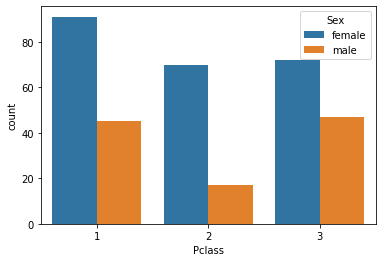

In [71]:
sns.countplot('Pclass',hue='Sex',data=titanic_df_survived)

In [72]:
#survival rate of female from pclass is high

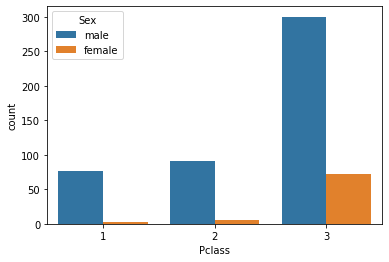

In [73]:
sns.countplot('Pclass',hue='Sex',data=titanic_df_dead)

In [74]:
#Even though more male travalled in the ship but female survival are more than male's
#dead rate in more in Pclass 3 and dead rate of male is have too higher than female

In [75]:
titanic_df_survived.groupby('Sex').count()['Survived']/titanic_Cleaned_df.groupby('Sex').count()['Survived']

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

## Sex

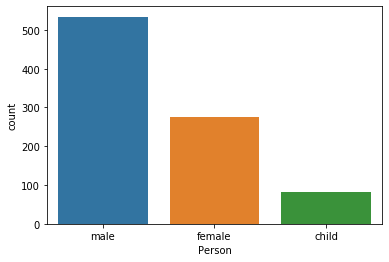

In [76]:
sns.countplot('Person',data=titanic_Cleaned_df)

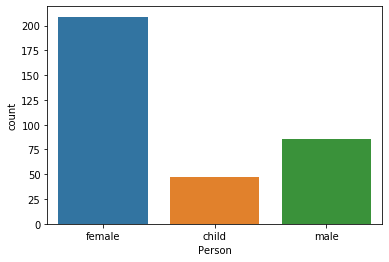

In [77]:
sns.countplot('Person',data=titanic_df_survived)

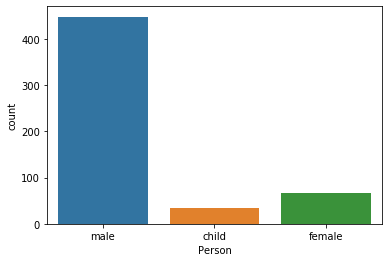

In [78]:
sns.countplot('Person',data=titanic_df_dead)

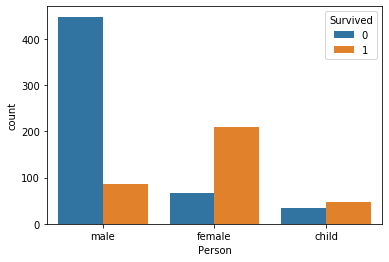

In [79]:
sns.countplot('Person',hue='Survived',data=titanic_Cleaned_df)

In [80]:
#rate of survival is more for female

## Age

In [81]:
titanic_Cleaned_df['AgeCluster']=pd.cut(titanic_Cleaned_df['Age'],bins=[0,10,20,30,40,50,60,70,80],labels=[('0-10'),('10-20'),('20-30'),('30-40'),('40-50'),('50-60'),('60-70'),('70-80')])

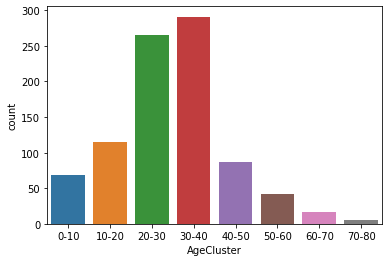

In [82]:
sns.countplot('AgeCluster',data=titanic_Cleaned_df)

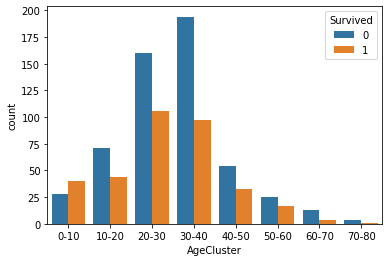

In [83]:
sns.countplot('AgeCluster',hue='Survived',data=titanic_Cleaned_df)

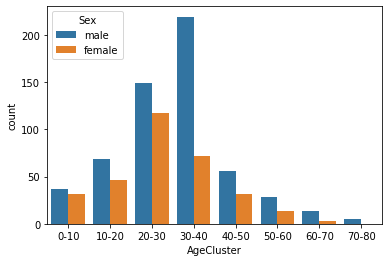

In [84]:
sns.countplot('AgeCluster',hue='Sex',data=titanic_Cleaned_df)

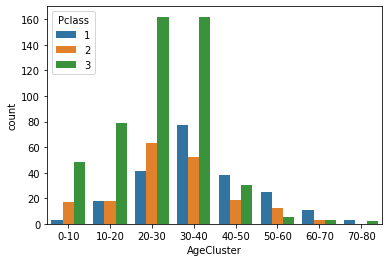

In [85]:
sns.countplot('AgeCluster',hue='Pclass',data=titanic_Cleaned_df)

In [86]:
#survival rate of age group 0-10 is high even though most of them are from Pclass 3

## SibSp

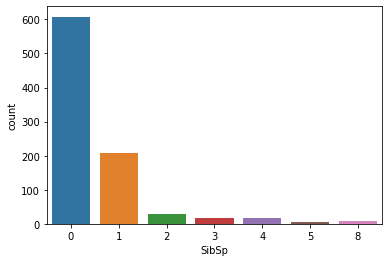

In [87]:
sns.countplot('SibSp',data=titanic_Cleaned_df)

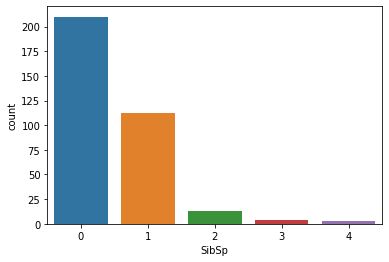

In [88]:
sns.countplot('SibSp',data=titanic_df_survived)

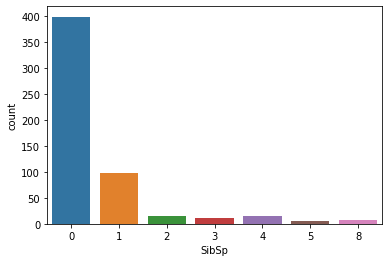

In [89]:
sns.countplot('SibSp',data=titanic_df_dead)

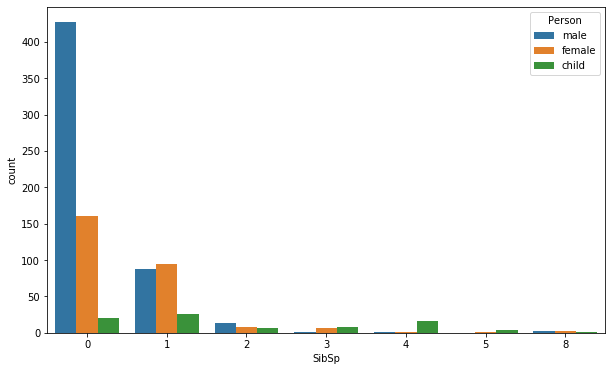

In [90]:
plt.figure(figsize=(10,6))
sns.countplot('SibSp',hue='Person',data=titanic_Cleaned_df)

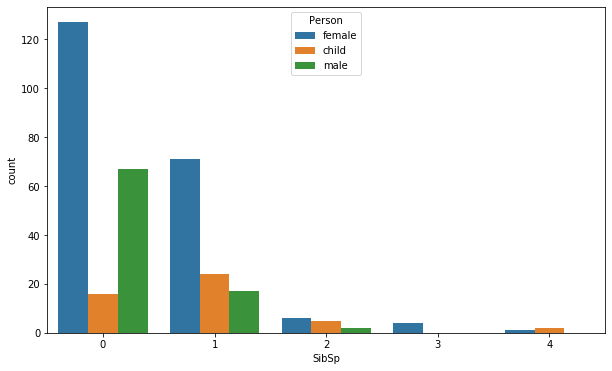

In [91]:
plt.figure(figsize=(10,6))
sns.countplot('SibSp',hue='Person',data=titanic_df_survived)

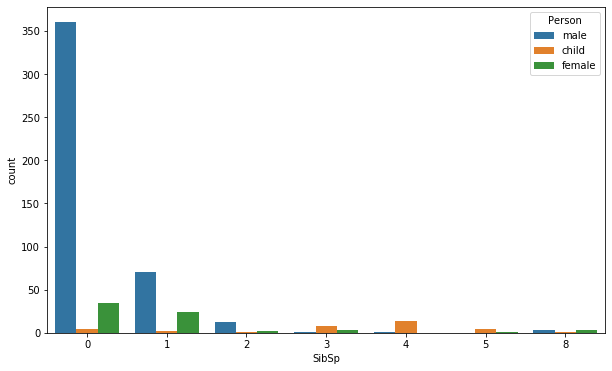

In [92]:
plt.figure(figsize=(10,6))
sns.countplot('SibSp',hue='Person',data=titanic_df_dead)

In [93]:
#females with no SibSp are under most survived but male with no SibSp are under most dead

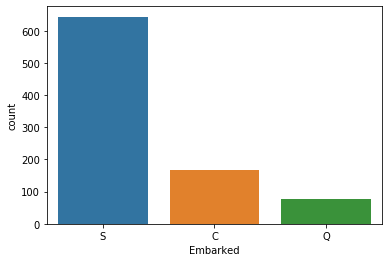

In [94]:
sns.countplot('Embarked',data=titanic_Cleaned_df)

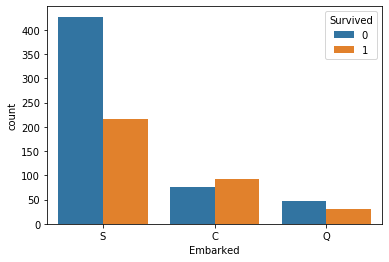

In [95]:
sns.countplot('Embarked',hue='Survived',data=titanic_Cleaned_df)

In [96]:
#passengers from Embarked C has survived more

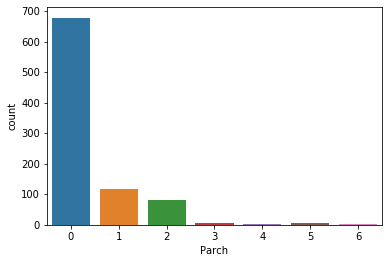

In [97]:
sns.countplot('Parch',data=titanic_Cleaned_df)

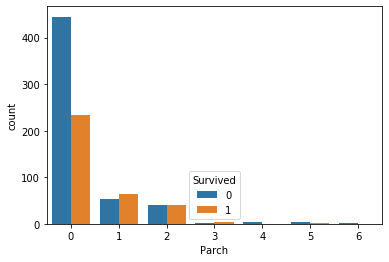

In [98]:
sns.countplot('Parch',hue='Survived',data=titanic_Cleaned_df)

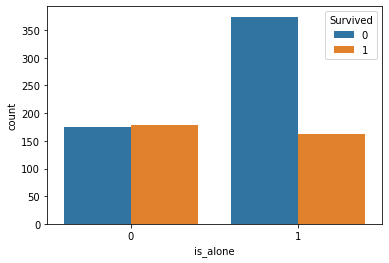

In [99]:
sns.countplot('is_alone',hue='Survived',data=titanic_Cleaned_df)

In [100]:
#survival rate of alone travellers is high

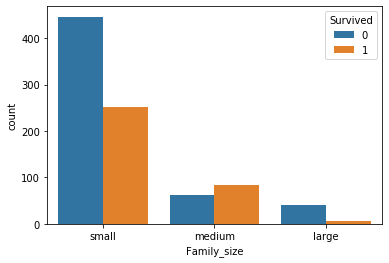

In [101]:
sns.countplot('Family_size',hue='Survived',data=titanic_Cleaned_df)

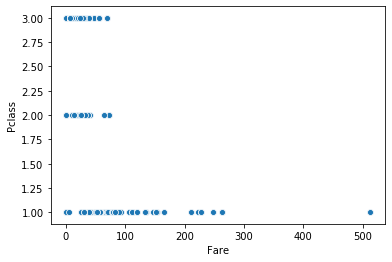

In [102]:
sns.scatterplot('Fare','Pclass',data=titanic_Cleaned_df)

In [103]:
titanic_Cleaned_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked', 'Title', 'Family_count', 'Family_size',
       'is_alone', 'Person', 'AgeCluster'],
      dtype='object')

In [104]:
titanic_Cleaned_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family_count,Family_size,is_alone,Person,AgeCluster
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,S,Mr,1,small,0,male,20-30
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.2833,C,Mrs,1,small,0,female,30-40
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,S,Miss,0,small,1,female,20-30
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53.1000,S,Mrs,1,small,0,female,30-40
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,8.0500,S,Mr,0,small,1,male,30-40


In [105]:
titanic_Cleaned_df.shape

(891, 16)

In [106]:
titanic_Cleaned_df.Sex=titanic_df.Sex.map({'male':1,'female':0})

In [107]:
test_df.Sex=test_df.Sex.map({'male':1,'female':0})

In [108]:
titanic_Cleaned_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family_count,Family_size,is_alone,Person,AgeCluster
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,7.2500,S,Mr,1,small,0,male,20-30
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,71.2833,C,Mrs,1,small,0,female,30-40
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,7.9250,S,Miss,0,small,1,female,20-30
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,53.1000,S,Mrs,1,small,0,female,30-40
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,8.0500,S,Mr,0,small,1,male,30-40


In [109]:
titanic_Cleaned_df[['C','Q','S']]=pd.get_dummies(titanic_Cleaned_df['Embarked'])

In [110]:
test_df[['C','Q','S']]=pd.get_dummies(test_df['Embarked'])

In [111]:
titanic_Cleaned_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family_count,Family_size,is_alone,Person,AgeCluster,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,7.2500,S,Mr,1,small,0,male,20-30,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,71.2833,C,Mrs,1,small,0,female,30-40,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,7.9250,S,Miss,0,small,1,female,20-30,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,53.1000,S,Mrs,1,small,0,female,30-40,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,8.0500,S,Mr,0,small,1,male,30-40,0,0,1


In [112]:
titanic_Cleaned_df[['large','medium','small']]=pd.get_dummies(titanic_Cleaned_df['Family_size'])

In [113]:
test_df[['large','medium','small']]=pd.get_dummies(test_df['Family_size'])

In [114]:
titanic_Cleaned_df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Family_count,is_alone,C,Q,S,large,medium,small
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.042493,-0.057527,-0.001652,0.012658,-0.040143,0.057462,-0.001205,-0.033606,0.022148,-0.042067,0.012378,0.011705
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.092376,-0.035322,0.081629,0.257307,0.016639,-0.203367,0.168240,0.003650,-0.155660,-0.113984,0.168088,-0.089185
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.340209,0.083081,0.018443,-0.549500,0.065997,0.135207,-0.243292,0.221009,0.081720,0.141167,-0.036511,-0.043796
Sex,0.042939,-0.543351,0.131900,1.000000,0.121248,-0.114631,-0.245489,-0.182333,-0.200988,0.303646,-0.082853,-0.074115,0.125722,-0.046629,-0.181193,0.188116
Age,0.042493,-0.092376,-0.340209,0.121248,1.000000,-0.268218,-0.198994,0.088828,-0.282732,0.199470,0.041877,-0.043476,-0.016906,-0.208937,-0.199597,0.292728
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.268218,1.000000,0.414838,0.159651,0.890712,-0.584471,-0.059528,-0.026354,0.070941,0.721698,0.230109,-0.598391
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.198994,0.414838,1.000000,0.216225,0.783111,-0.583398,-0.011069,-0.081228,0.063036,0.580022,0.509191,-0.772284
Fare,0.012658,0.257307,-0.549500,-0.182333,0.088828,0.159651,0.216225,1.000000,0.217138,-0.271832,0.269335,-0.117216,-0.166603,0.124240,0.110459,-0.166672
Family_count,-0.040143,0.016639,0.065997,-0.200988,-0.282732,0.890712,0.783111,0.217138,1.000000,-0.690922,-0.046215,-0.058592,0.079977,0.783025,0.411655,-0.794800
is_alone,0.057462,-0.203367,0.135207,0.303646,0.199470,-0.584471,-0.583398,-0.271832,-0.690922,1.000000,-0.095298,0.086464,0.024929,-0.290645,-0.545235,0.647644


In [115]:
titanic_Cleaned_df.isna().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Fare            0
Embarked        2
Title           0
Family_count    0
Family_size     0
is_alone        0
Person          0
AgeCluster      0
C               0
Q               0
S               0
large           0
medium          0
small           0
dtype: int64

## Model Buliding

In [116]:
#using all the features

In [181]:
titanic_df_withoutnull=titanic_Cleaned_df[['PassengerId','Survived','Pclass','Sex','Age','SibSp','Parch','Fare','C','Q','large','medium','Family_count','is_alone']]

In [183]:
titanic_df_withoutnull.set_index('PassengerId',inplace=True)

In [184]:
test_df_withoutnull=test_df[['PassengerId','Survived','Pclass','Sex','Age','SibSp','Parch','Fare','C','Q','large','medium','Family_count','is_alone']]

In [185]:
test_df_withoutnull.set_index('PassengerId',inplace=True)

In [186]:
test_df_withoutnull.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,large,medium,Family_count,is_alone
PassengerId,,,,,,,,,,,,,
892,0,3,1,35,0,0,7.8292,0,1,0,0,0,1
893,1,3,0,47,1,0,7.0000,0,0,0,0,1,0


In [187]:
titanic_df_withoutnull.shape

(891, 13)

In [188]:
#we will use this later for final model building
y_lc=titanic_df_withoutnull['Survived']

In [189]:
y=titanic_df_withoutnull.pop('Survived')

In [190]:
X=titanic_df_withoutnull.copy()

In [191]:
X_lc=titanic_df_withoutnull.copy()

In [192]:
X.shape

(891, 12)

In [193]:
import warnings
warnings.filterwarnings('ignore')

In [194]:
import statsmodels.api as sm

In [195]:
X_sm=sm.add_constant(X)
model1=sm.Logit(y,X_sm).fit()

Optimization terminated successfully.
         Current function value: 0.429094
         Iterations 8


In [196]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      879
Method:                           MLE   Df Model:                           11
Date:                Wed, 02 Oct 2019   Pseudo R-squ.:                  0.3556
Time:                        17:31:50   Log-Likelihood:                -382.32
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.293e-83
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            5.5822      0.649      8.604      0.000       4.311       6.854
Pclass          -1.0768      0.146     -7.360      0.000      -1.364      -0.790
Sex             -2.6820      0.206    -13.019      0.000      -3.086      -2.278
Age             -0.0399      0.008     -4.986      0.000      -0.056      -0.024
SibSp           -0.3648    3.9e+06  -9.37e-08      1.000   -7.64e+06    7.64e+06
Parch           -0.2250    3.9e+06  -5.78e-08      1.000   -7.64e+06    7.64e+06
Fare             0.0018      0.002      0.780      0.435      -0.003       0.006
C                0.3363      0.240      1.398      0.162      -0.135       0.808
Q                0.2773      0.342      0.811      0.417      -0.393       0.947
large            2.2023      1.415      1.557      0.120      -0.570       4.975
medium           1.3732      0.526      2.612      0.009       0.343       2.403
Family_count    -0.5898    3.9e+06  -1.51e-07      1.000   -7.64e+06    7.64e+06
is_alone        -0.8905      0.379     -2.348      0.019      -1.634      -0.147
================================================================================
"""

In [197]:
#this shows SibSp variables is insignificant as it has high p value

In [198]:
X.drop('SibSp',inplace=True,axis=1)
X_sm=sm.add_constant(X)
model2=sm.Logit(y,X_sm).fit()

Optimization terminated successfully.
         Current function value: 0.429094
         Iterations 7


In [199]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      879
Method:                           MLE   Df Model:                           11
Date:                Wed, 02 Oct 2019   Pseudo R-squ.:                  0.3556
Time:                        17:31:52   Log-Likelihood:                -382.32
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.293e-83
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            5.5822      0.649      8.604      0.000       4.311       6.854
Pclass          -1.0768      0.146     -7.360      0.000      -1.364      -0.790
Sex             -2.6820      0.206    -13.019      0.000      -3.086      -2.278
Age             -0.0399      0.008     -4.986      0.000      -0.056      -0.024
Parch            0.1398      0.214      0.654      0.513      -0.279       0.559
Fare             0.0018      0.002      0.780      0.435      -0.003       0.006
C                0.3363      0.240      1.398      0.162      -0.135       0.808
Q                0.2773      0.342      0.811      0.417      -0.393       0.947
large            2.2023      1.415      1.557      0.120      -0.570       4.975
medium           1.3732      0.526      2.612      0.009       0.343       2.403
Family_count    -0.9547      0.303     -3.149      0.002      -1.549      -0.360
is_alone        -0.8905      0.379     -2.348      0.019      -1.634      -0.147
================================================================================
"""

In [200]:
#this shows Parch variables is insignificant as it has high p value

In [201]:
X.drop('Parch',inplace=True,axis=1)
X_sm=sm.add_constant(X)
model3=sm.Logit(y,X_sm).fit()

Optimization terminated successfully.
         Current function value: 0.429333
         Iterations 7


In [202]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      880
Method:                           MLE   Df Model:                           10
Date:                Wed, 02 Oct 2019   Pseudo R-squ.:                  0.3553
Time:                        17:31:54   Log-Likelihood:                -382.54
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 2.386e-84
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            5.5490      0.646      8.592      0.000       4.283       6.815
Pclass          -1.0741      0.146     -7.351      0.000      -1.360      -0.788
Sex             -2.6962      0.205    -13.157      0.000      -3.098      -2.295
Age             -0.0394      0.008     -4.946      0.000      -0.055      -0.024
Fare             0.0019      0.002      0.821      0.412      -0.003       0.006
C                0.3479      0.240      1.452      0.146      -0.122       0.817
Q                0.2669      0.341      0.782      0.434      -0.402       0.936
large            2.3230      1.402      1.657      0.098      -0.425       5.071
medium           1.4568      0.508      2.868      0.004       0.461       2.452
Family_count    -0.9088      0.293     -3.097      0.002      -1.484      -0.334
is_alone        -0.8704      0.377     -2.309      0.021      -1.609      -0.132
================================================================================
"""

In [203]:
#Above summary shows Q as insignificant

In [204]:
X.drop('Q',inplace=True,axis=1)
X_sm=sm.add_constant(X)
model4=sm.Logit(y,X_sm).fit()

Optimization terminated successfully.
         Current function value: 0.429674
         Iterations 7


In [205]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      881
Method:                           MLE   Df Model:                            9
Date:                Wed, 02 Oct 2019   Pseudo R-squ.:                  0.3548
Time:                        17:31:56   Log-Likelihood:                -382.84
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 4.562e-85
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            5.5649      0.647      8.598      0.000       4.296       6.833
Pclass          -1.0532      0.144     -7.336      0.000      -1.335      -0.772
Sex             -2.7236      0.203    -13.433      0.000      -3.121      -2.326
Age             -0.0395      0.008     -4.946      0.000      -0.055      -0.024
Fare             0.0020      0.002      0.867      0.386      -0.003       0.007
C                0.3272      0.238      1.373      0.170      -0.140       0.794
large            2.4233      1.402      1.729      0.084      -0.324       5.171
medium           1.4826      0.508      2.917      0.004       0.487       2.479
Family_count    -0.9347      0.292     -3.197      0.001      -1.508      -0.362
is_alone        -0.8806      0.377     -2.334      0.020      -1.620      -0.141
================================================================================
"""

In [206]:
X.drop('Fare',inplace=True,axis=1)
X_sm=sm.add_constant(X)
model5=sm.Logit(y,X_sm).fit()

Optimization terminated successfully.
         Current function value: 0.430121
         Iterations 7


In [207]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      882
Method:                           MLE   Df Model:                            8
Date:                Wed, 02 Oct 2019   Pseudo R-squ.:                  0.3541
Time:                        17:31:57   Log-Likelihood:                -383.24
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 9.004e-86
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            5.7693      0.604      9.548      0.000       4.585       6.954
Pclass          -1.1133      0.126     -8.812      0.000      -1.361      -0.866
Sex             -2.7297      0.202    -13.484      0.000      -3.127      -2.333
Age             -0.0398      0.008     -4.989      0.000      -0.055      -0.024
C                0.3667      0.233      1.571      0.116      -0.091       0.824
large            2.4530      1.393      1.761      0.078      -0.277       5.183
medium           1.4768      0.507      2.913      0.004       0.483       2.470
Family_count    -0.9242      0.290     -3.183      0.001      -1.493      -0.355
is_alone        -0.9000      0.375     -2.401      0.016      -1.635      -0.165
================================================================================
"""

In [208]:
X.drop('C',inplace=True,axis=1)
X_sm=sm.add_constant(X)
model6=sm.Logit(y,X_sm).fit()

Optimization terminated successfully.
         Current function value: 0.431500
         Iterations 7


In [209]:
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      883
Method:                           MLE   Df Model:                            7
Date:                Wed, 02 Oct 2019   Pseudo R-squ.:                  0.3520
Time:                        17:31:58   Log-Likelihood:                -384.47
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 3.769e-86
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            5.9748      0.592     10.095      0.000       4.815       7.135
Pclass          -1.1469      0.124     -9.212      0.000      -1.391      -0.903
Sex             -2.7252      0.202    -13.499      0.000      -3.121      -2.329
Age             -0.0402      0.008     -5.051      0.000      -0.056      -0.025
large            2.4111      1.385      1.740      0.082      -0.304       5.127
medium           1.4699      0.506      2.904      0.004       0.478       2.462
Family_count    -0.9367      0.289     -3.245      0.001      -1.502      -0.371
is_alone        -0.9623      0.371     -2.595      0.009      -1.689      -0.236
================================================================================
"""

In [210]:
X.drop('large',inplace=True,axis=1)
X_sm=sm.add_constant(X)
model7=sm.Logit(y,X_sm).fit()

Optimization terminated successfully.
         Current function value: 0.433236
         Iterations 7


In [211]:
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      884
Method:                           MLE   Df Model:                            6
Date:                Wed, 02 Oct 2019   Pseudo R-squ.:                  0.3494
Time:                        17:31:59   Log-Likelihood:                -386.01
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 2.000e-86
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            5.5632      0.532     10.463      0.000       4.521       6.605
Pclass          -1.1448      0.124     -9.208      0.000      -1.389      -0.901
Sex             -2.6851      0.199    -13.463      0.000      -3.076      -2.294
Age             -0.0404      0.008     -5.076      0.000      -0.056      -0.025
medium           0.7714      0.298      2.589      0.010       0.187       1.355
Family_count    -0.4882      0.115     -4.256      0.000      -0.713      -0.263
is_alone        -0.5754      0.290     -1.986      0.047      -1.143      -0.008
================================================================================
"""

In [212]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
Logistic_classfier=LogisticRegression(solver='lbfgs')
lc=Logistic_classfier.fit(X_lc,y_lc)

In [213]:
#lets take 6 features
rfe=RFE(lc,6)

In [214]:
selector=rfe.fit(X_lc,y_lc)

In [215]:
pd.DataFrame(zip(X_lc.columns,selector.support_,selector.ranking_),columns=['Features','Selected_or_not','Rank'])

,Features,Selected_or_not,Rank
0,Pclass,True,1
1,Sex,True,1
2,Age,False,5
3,SibSp,False,3
4,Parch,False,4
5,Fare,False,7
6,C,True,1
7,Q,False,2
8,large,False,6
9,medium,True,1


In [216]:
X_sm=X_lc[['Pclass','Sex','C','medium','Family_count','is_alone']]
X_sm=sm.add_constant(X_sm)
model8=sm.Logit(y,X_sm).fit()

Optimization terminated successfully.
         Current function value: 0.447182
         Iterations 7


In [217]:
model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      884
Method:                           MLE   Df Model:                            6
Date:                Wed, 02 Oct 2019   Pseudo R-squ.:                  0.3285
Time:                        17:32:04   Log-Likelihood:                -398.44
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 4.405e-81
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            3.5324      0.379      9.327      0.000       2.790       4.275
Pclass          -0.8583      0.111     -7.722      0.000      -1.076      -0.640
Sex             -2.7175      0.197    -13.802      0.000      -3.103      -2.332
C                0.3972      0.228      1.746      0.081      -0.049       0.843
medium           0.9012      0.293      3.078      0.002       0.327       1.475
Family_count    -0.4024      0.110     -3.671      0.000      -0.617      -0.188
is_alone        -0.5156      0.286     -1.800      0.072      -1.077       0.046
================================================================================
"""

In [218]:
#above C's has insignificant p values and overall R^2 is also 0.3285 so we wil  go with model7

In [219]:
test_df_withoutnull.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,large,medium,Family_count,is_alone
PassengerId,,,,,,,,,,,,,
892,0,3,1,35,0,0,7.8292,0,1,0,0,0,1
893,1,3,0,47,1,0,7.0000,0,0,0,0,1,0


In [220]:
X_train=titanic_df_withoutnull[['Pclass','Sex','Age','medium','Family_count','is_alone']]

In [221]:
X_train.shape

(891, 6)

In [222]:
X_train_sm=sm.add_constant(X_train)

In [224]:
y_train=y_lc

In [225]:
model_final=sm.Logit(y_train,X_train_sm).fit()

Optimization terminated successfully.
         Current function value: 0.433236
         Iterations 7


In [226]:
X_test=test_df_withoutnull[['Pclass','Sex','Age','medium','Family_count','is_alone']]

In [227]:
X_test_sm=sm.add_constant(X_test)

In [228]:
X_test_sm.shape

(418, 7)

In [161]:
y_test=test_df_withoutnull['Survived']

In [230]:
y_test.shape

(418,)

In [231]:
y_test_predict=model_final.predict(X_test_sm)

In [232]:
def sigmoid(y_predict):
    return [1 if i>=0.5 else 0 for i in y_predict]

In [233]:
y_test_predict=sigmoid(y_test_predict)

In [234]:
from sklearn.metrics import classification_report,accuracy_score

In [235]:
accuracy_score(y_test,y_test_predict)

0.9449760765550239

In [241]:
submission=pd.DataFrame(list(zip(X_test_sm.index,y_test_predict)),columns=['PassengerId','Survived'])

In [261]:
submission.to_csv('Logitsubmission.csv',index=False)

## Using SVC

In [243]:
from sklearn.svm import LinearSVC

In [244]:
linearsvc=LinearSVC()

In [245]:
linearsvc.fit(X_train,y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [246]:
y_predict=linearsvc.predict(X_test)

In [247]:
accuracy_score(y_test,y_predict)

0.8947368421052632

In [248]:
from sklearn.svm import SVC #'linear', 'poly', 'rbf', 'sigmoid', 'precomputed' or a callable.

In [249]:
svc=SVC(kernel='linear',gamma='scale')

In [250]:
svc.fit(X_train,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [251]:
y_predict=svc.predict(X_test)

In [252]:
y_test.value_counts()

0    266
1    152
Name: Survived, dtype: int64

In [253]:
accuracy_score(y_test,y_predict)

0.9856459330143541

In [254]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       266
           1       1.00      0.96      0.98       152

    accuracy                           0.99       418
   macro avg       0.99      0.98      0.98       418
weighted avg       0.99      0.99      0.99       418



In [255]:
svc_submission=pd.DataFrame(list(zip(X_test.index,y_predict)),columns=['PassengerId','Survived'])

In [259]:
svc_submission.to_csv('SVC-submission.csv',index=False)